First 5 rows:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic



Data shape: (114000, 21)

Data types:
 Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Missing values:
 Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrument

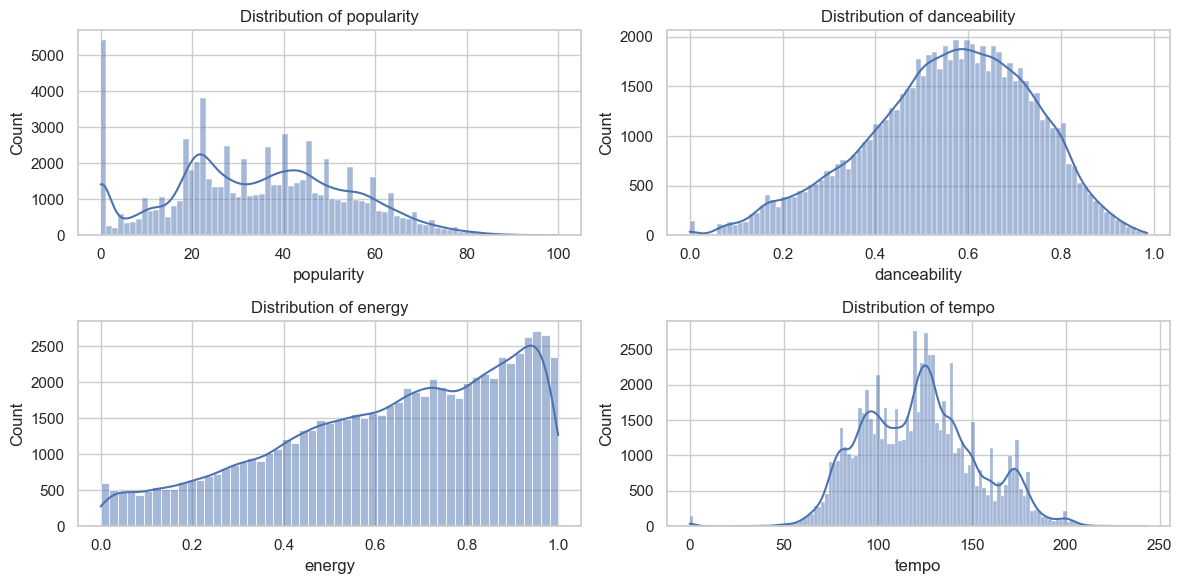


Top genres:


track_genre
black-metal    981
comedy         965
afrobeat       945
heavy-metal    944
cantopop       935
bluegrass      930
forro          925
anime          925
grindcore      924
malay          921
Name: count, dtype: int64

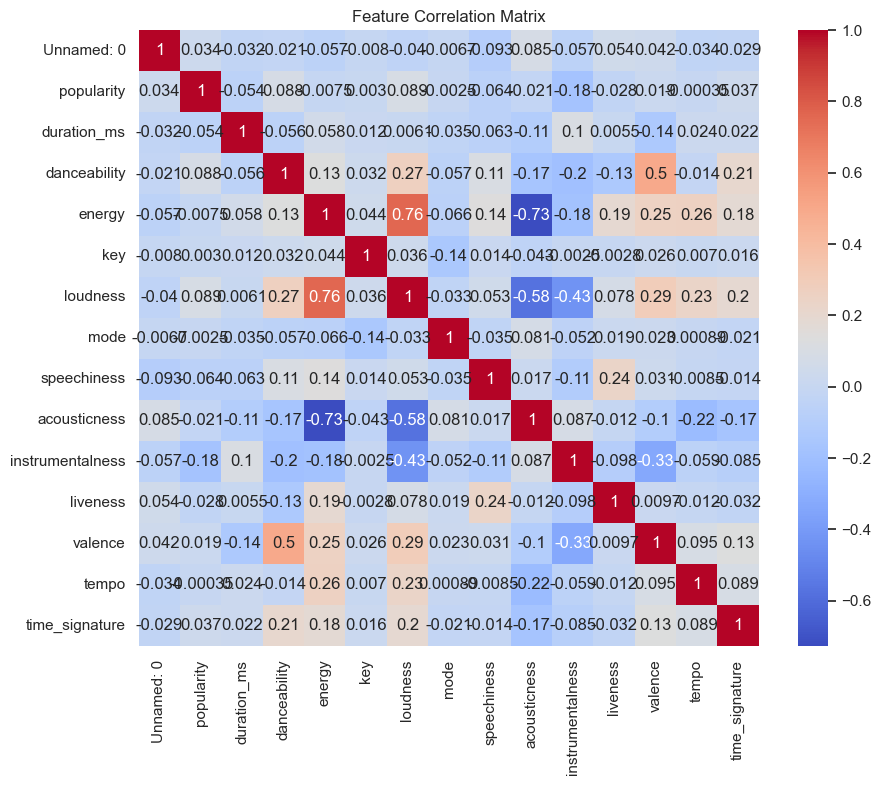


Preprocessing complete. Processed data saved to /data directory.


In [1]:
# Data Exploration and Preprocessing Notebook
# ===========================================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Set visualization style
sns.set(style="whitegrid")

# Load Data
tracks = pd.read_csv('../data/tracks_records.csv')

# Initial Data Inspection
print("First 5 rows:")
display(tracks.head())

print("\nData shape:", tracks.shape)
print("\nData types:\n", tracks.dtypes)
print("\nMissing values:\n", tracks.isnull().sum())

# Data Cleaning
## Drop duplicates and missing values
tracks_clean = tracks.dropna().drop_duplicates(subset=['track_name'])  # Use track_name
print(f"\nCleaned data shape: {tracks_clean.shape}")

# Feature Analysis
## Numerical Features
numerical_cols = tracks_clean.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumerical features:", numerical_cols)

plt.figure(figsize=(12, 6))
for i, col in enumerate(['popularity', 'danceability', 'energy', 'tempo']):
    plt.subplot(2, 2, i+1)
    sns.histplot(tracks_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Text Features (Genres)
print("\nTop genres:")
genre_counts = tracks_clean['track_genre'].str.split(', ').explode().value_counts()  # Use track_genre
display(genre_counts.head(10))

# Correlation Analysis
plt.figure(figsize=(10, 8))
corr_matrix = tracks_clean[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Preprocessing
## Text Feature Engineering
tfidf = TfidfVectorizer(max_features=1000)
genre_matrix = tfidf.fit_transform(tracks_clean['track_genre'])  # Use track_genre

## Numerical Feature Scaling
scaler = StandardScaler()
numeric_features = scaler.fit_transform(tracks_clean[numerical_cols])

# Save processed data
tracks_clean.to_csv('../data/tracks_processed.csv', index=False)
np.save('../data/genre_matrix.npy', genre_matrix)
np.save('../data/numeric_features.npy', numeric_features)

print("\nPreprocessing complete. Processed data saved to /data directory.")